In [1]:
import yt
import astropy.units as u
%matplotlib inline 
import matplotlib.pyplot as plt
import h5py

In [2]:
unit_base = {
    "length": (1.0, "pc"),
    "velocity": (100, "cm/s"),
    "mass": (1.0, "Msun"),
}
ds = yt.load('../data/snapshot_296.hdf5', unit_base=unit_base)
ds

yt : [INFO     ] 2024-02-23 08:04:20,532 ComovingIntegrationOn != 1 or (not found and OmegaLambda is 0.0), so we are turning off Cosmology.
yt : [INFO     ] 2024-02-23 08:04:20,554 Parameters: current_time              = 0.0002463474080710203
yt : [INFO     ] 2024-02-23 08:04:20,554 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-02-23 08:04:20,555 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-02-23 08:04:20,555 Parameters: domain_right_edge         = [8.16 8.16 8.16]
yt : [INFO     ] 2024-02-23 08:04:20,555 Parameters: cosmological_simulation   = 0


GizmoDataset: /Users/alexanderescamilla/research/data/snapshot_296.hdf5

In [22]:
ad = ds.all_data()
cr = ad.include_below(("PartType0", "ParticleIDs"), 1e3)

In [36]:
print(cr.quantities.total_quantity(("PartType0", 'density')))

1457976552.4981961 code_mass/code_length**3


yt : [INFO     ] 2024-02-22 13:18:50,879 ComovingIntegrationOn != 1 or (not found and OmegaLambda is 0.0), so we are turning off Cosmology.
yt : [INFO     ] 2024-02-22 13:18:50,901 Parameters: current_time              = 0.0002463474080710203
yt : [INFO     ] 2024-02-22 13:18:50,901 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-02-22 13:18:50,901 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-02-22 13:18:50,902 Parameters: domain_right_edge         = [8.16 8.16 8.16]
yt : [INFO     ] 2024-02-22 13:18:50,902 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2024-02-22 13:18:50,948 Allocating for 1.084e+07 particles
Loading particle index: 100%|█████████████████| 42/42 [00:00<00:00, 3096.24it/s]
yt : [INFO     ] 2024-02-22 13:18:51,719 xlim = 0.000000 8.160000
yt : [INFO     ] 2024-02-22 13:18:51,720 ylim = 0.000000 8.160000
yt : [INFO     ] 2024-02-22 13:18:51,721 xlim = 0.000000 8.160000
yt : [INFO     ] 2024-02-22 13:18:51,721

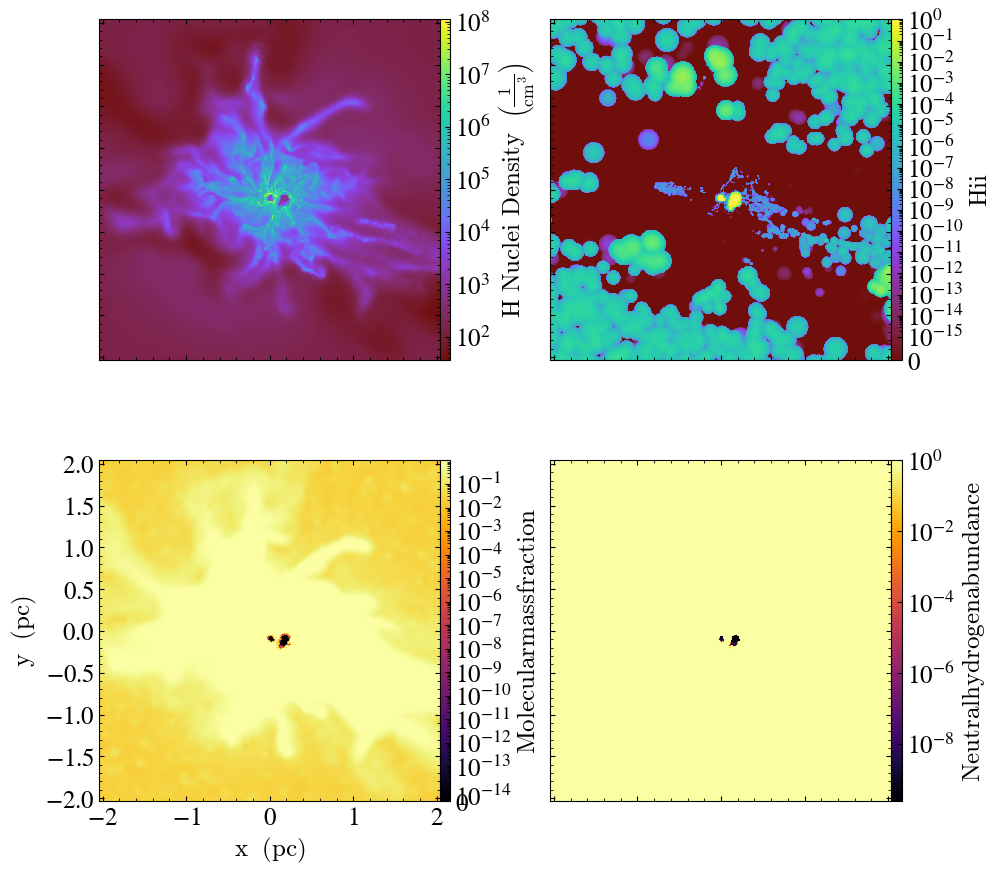

In [49]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid

import yt


ds = yt.load('../data/snapshot_296.hdf5', unit_base=unit_base) 

fig = plt.figure()
grid = AxesGrid(
    fig,
    (0.075, 0.075, 0.85, 0.85),
    nrows_ncols=(2, 2),
    axes_pad=1.0,
    label_mode="1",
    share_all=True,
    cbar_location="right",
    cbar_mode="each",
    cbar_size="3%",
    cbar_pad="0%",
)

fields = [
    ("PartType0", "H_nuclei_density"),
    ("PartType0", 'HII'),
    ('PartType0', 'MolecularMassFraction'),
    ('PartType0', 'NeutralHydrogenAbundance'),
]

p = yt.SlicePlot(ds, "z", fields)

p.set_cmap(field=('PartType0', 'MolecularMassFraction'), cmap="inferno")
p.set_cmap(field=('PartType0', 'NeutralHydrogenAbundance'), cmap="inferno")

p.zoom(2)


for i, field in enumerate(fields):
    plot = p.plots[field]
    plot.figure = fig
    plot.axes = grid[i].axes
    plot.cax = grid.cbar_axes[i]
p.render()